In [1]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np

In [2]:
path ="/ibpc/lumo/sritharan/These/Papier/Papier_1/Data/pLDDT"
os.chdir(path)

In [3]:
# Read the CSV file into a DataFrame
data = pd.read_csv("all_pLDDT.csv")

# Rename the columns
data.columns = ["residue", "OF", "ESM", "TR", "AF2", "AFM"]

In [4]:
data

,residue,OF,ESM,TR,AF2,AFM
0,1,19.59,55.63,50.44,40.63,26.12
1,2,27.72,65.66,51.70,36.73,34.58
2,3,28.04,69.58,57.37,39.44,40.89
3,4,31.23,61.10,59.67,41.38,42.27
4,5,31.66,59.40,59.67,45.14,50.54
...,...,...,...,...,...,...
771,772,52.72,60.76,69.10,76.54,72.41
772,773,50.74,54.01,68.30,72.59,69.96
773,774,48.45,38.04,67.60,80.49,73.48
774,775,48.13,31.18,68.10,81.94,75.40


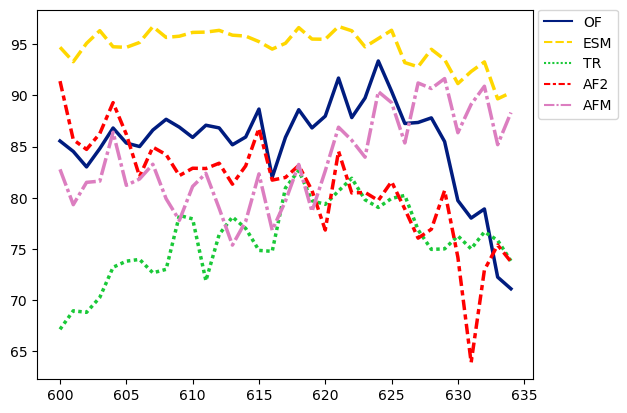

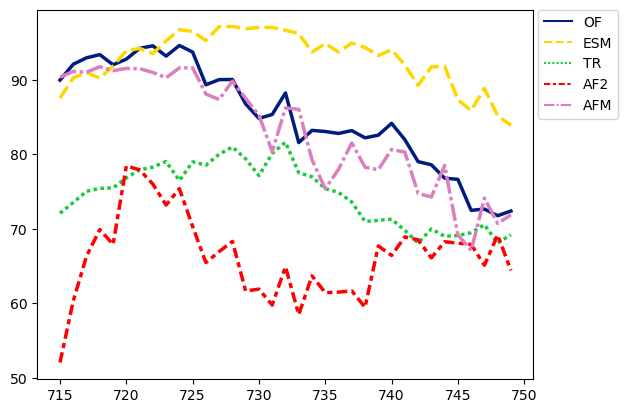

In [5]:

# Define the groups
groups = [1, 2, 3, 4, 5]

# Define a custom color palette
custom_palette = {
    'AFM': sns.color_palette("muted")[6],  # color for 'AF_multi'
    'TR': sns.color_palette("bright")[2],  # color for 'tr-rose'
    'OF': sns.color_palette("dark")[0],  # color for 'omega'
    'ESM': "gold",  # color for 'esm'
    'AF2': "red"  # color for 'AF'
}

def plot_PLDDT(data, residue_range, filename):
    """
    Function to create a line plot of PLDDT values for a specific range of residues.

    Parameters:
    - data: a pandas DataFrame containing the PLDDT values.
    - residue_range: a tuple specifying the start and end indices for the residues.
    - filename: the name of the output file where the plot will be saved.

    The function creates a line plot where the x-axis corresponds to the residues, 
    and the y-axis corresponds to the PLDDT values. The color of the lines are defined 
    by the `custom_palette` dictionary.
    """

    # Slice the DataFrame to include only the specified residues
    data_subset = data.iloc[residue_range[0]:residue_range[1], groups]

    # Create a new figure for each plot
    plt.figure()

    # Create the line plot
    plot = sns.lineplot(data=data_subset, palette=custom_palette, linewidth=2.5)

    # Move the legend outside of the plot
    plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)

    # Save the plot as a PNG file
    plt.savefig(filename, format="png", dpi=600, bbox_inches="tight", transparent=True)

# Call the function for HP1 and HP2 residues
plot_PLDDT(data, (600, 635), "HP1-PLDDT.png")
plot_PLDDT(data, (715, 750), "HP2-PLDDT.png")


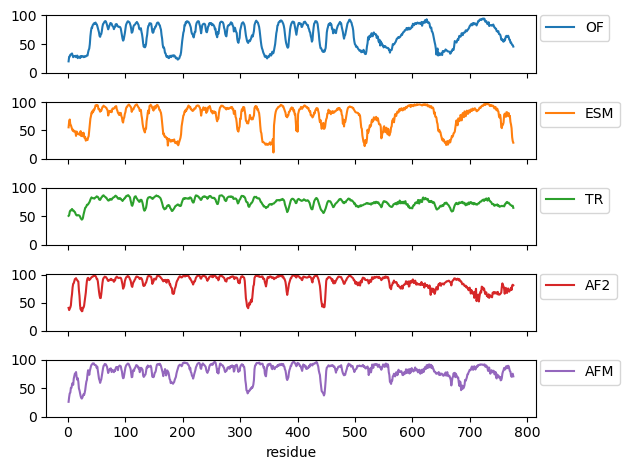

In [6]:
def plot_residue(data, filename):
    """
    Function to create line plots for each column in a DataFrame, sharing the x-axis.

    Parameters:
    - data: a pandas DataFrame containing the data to be plotted. The "residue" column is used for the x-axis.
    - filename: the name of the output file where the plot will be saved.

    The function creates a line plot for each column (except "residue") in the DataFrame. 
    All plots share the same x-axis, but have independent y-axes. The legends are placed outside of the plots.
    """

    # Create subplots
    data.plot(x="residue", kind='line', subplots=True, sharex=True, sharey=False, legend=False, yticks=np.arange(0, 101, 50))

    # Add legends outside of the plots
    for ax in plt.gcf().axes:
        ax.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)

    # Adjust the layout
    plt.tight_layout()

    # Save the plot as a PNG file
    plt.savefig(filename, format="png", dpi=150, bbox_inches="tight")

# Call the function
plot_residue(data, "plddt_sub.png")
